y_predicted= [1.9000000000000015, 2.960000000000002, 4.020000000000003, 5.080000000000004, 6.140000000000004]


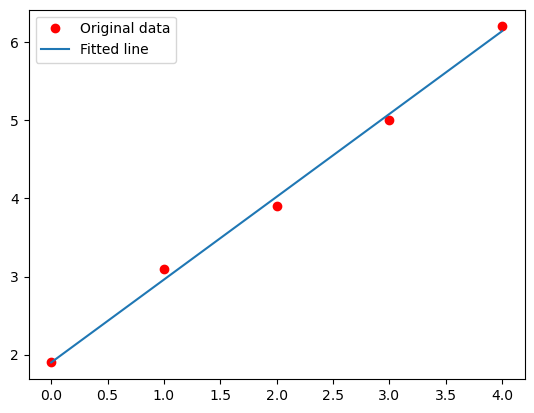

In [8]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([0, 1, 2, 3, 4], dtype=np.float32)
y = np.array([1.9, 3.1, 3.9, 5.0, 6.2], dtype=np.float32)

def predict(a, xt):
    return a[0] + a[1] * xt

def MSE(a, x, y):
    total = 0
    for i in range(len(x)):
        total += (y[i] - predict(a, x[i])) ** 2
    return total

def optimize():
    best_loss = float('inf')
    best_p = [0, 0]
    learning_rate = 0.01

    p = [0, 0]
    while True:
        neighbors = [
            [p[0] + learning_rate, p[1]],
            [p[0] - learning_rate, p[1]],
            [p[0], p[1] + learning_rate],
            [p[0], p[1] - learning_rate]
        ]
        losses = [MSE(neighbor, x, y) for neighbor in neighbors]
        min_loss = min(losses)

        if min_loss >= best_loss:
            break

        best_loss = min_loss
        best_p = neighbors[losses.index(min_loss)]
        p = best_p

    return best_p

p = optimize()

# Plot the graph
y_predicted = list(map(lambda t: p[0] + p[1] * t, x))
print('y_predicted=', y_predicted)
plt.plot(x, y, 'ro', label='Original data')
plt.plot(x, y_predicted, label='Fitted line')
plt.legend()
plt.show()